# Template notebook

git repo: https://github.com/karamfr/edukate_hackathon

It's good to start with an introduction, to set the scene and introduce your audience to the data, and the problem you're solving as a team.

<br>

## Libraries
As always, we'll start by importing the necessary libraries.

In [2]:
# It's good practice to add comments to explain your code 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Functions

In [3]:
def summarise_columns(input_df):
    df_summary = pd.DataFrame(input_df.isnull().sum(),columns = ['null_count'])
    df_summary['null_proportion'] = df_summary['null_count']/len(input_df)
    df_summary['count_unique'] = input_df.nunique()
    df_summary['data_type'] = input_df.dtypes
    return df_summary
 
#define a function to show different values for each column
 
def value_counts_summary(input_df,factor_name,sort_index = False, max_levels = 1000):
    #create 
    summary_df = pd.DataFrame(columns = ['count','proportion','cumul_proportion'])
 
    if sort_index:
        summary_df['count'] = input_df[factor_name].value_counts().sort_index()
    else:
        summary_df['count'] = input_df[factor_name].value_counts()
 
    summary_df['proportion'] = summary_df['count']/len(input_df)
    summary_df['cumul_proportion'] = summary_df['proportion'].cumsum()
    summary_df.reset_index(inplace= True)
    return summary_df[:min(max_levels,len(summary_df))]

In [109]:
"""
def get_data(df, train_start = '2020-03-21', test_start = '2020-03-31', test_end = '2020-04-07', source='paper'):
    """
    Function to produce train-validation and test dfs
    """
    df = df[df['corona_result'] != 'other']
    
    train_start = pd.to_datetime(train_start)
    test_start = pd.to_datetime(test_start)
    test_end = pd.to_datetime(test_end)
    
    if source == 'paper':
        df_trainvalidation = df[df['test_date'].between('2020-03-21', '2020-03-31', 'right')]
        df_test = df[df['test_date'].between('2020-03-31', '2020-04-07', 'right')]
        return df_trainvalidation, df_test
    else:
        df_trainvalidation = df[df['test_date'].between(train_start, test_start, 'right')]
        df_test = df[df['test_date'].between(test_start, test_end, 'right')]
    
    return df_trainvalidation, df_test
"""

In [110]:
def get_data(df,source = 'paper', train_end = '2020-03-31',test_end = '2020-04-30'):#,train_start,test_start,test_end:
    if source == 'paper':
        df_trainvalidation = df[df['test_date'].between('2020-03-21','2020-03-31','right')]
        df_test = df[df['test_date'].between('2020-03-31','2020-04-07','right')]
    else:
        df_trainvalidation = df[df['test_date'].between('2020-03-21',train_end,'right')]
        df_test = df[df['test_date'].between(train_end,test_end,'right')]
    return df_trainvalidation,df_test

## Import data 

In [5]:
df = pd.read_csv("data/corona_tested_individuals_ver_006.english.csv")

/tmp/ipykernel_30/1990088523.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/corona_tested_individuals_ver_006.english.csv")


## EDA

In [6]:
df['corona_result'].value_counts(normalize=True)

corona_result
negative    0.933222
positive    0.052821
other       0.013957
Name: proportion, dtype: float64

In [7]:
num_rows = df.shape[0]
num_features = df.shape[1]

df.dtypes

test_date               object
cough                  float64
fever                  float64
sore_throat            float64
shortness_of_breath    float64
head_ache              float64
corona_result           object
age_60_and_above        object
gender                  object
test_indication         object
dtype: object

In [8]:
# filter data to a subset to mirror the date range
df['test_date'] = pd.to_datetime(df['test_date'])


In [9]:
df_paper_train = df[df['test_date'].between('2020-03-21', '2020-03-31', 'right')]
df_paper_test = df[df['test_date'].between('2020-03-31', '2020-04-07', 'right')]

value_counts_summary(df_paper_test, 'test_date', sort_index=True)

,test_date,count,proportion,cumul_proportion
0,2020-04-01,8654,0.177068,0.177068
1,2020-04-02,8188,0.167533,0.344600
2,2020-04-03,8079,0.165303,0.509903
3,2020-04-04,5145,0.105271,0.615174
4,2020-04-05,7509,0.153640,0.768814
5,2020-04-06,5368,0.109833,0.878647
6,2020-04-07,5931,0.121353,1.000000


In [10]:
print(f"Shape of train-validation date range used in paper {df_paper_train.shape}")
print(f"Shape of test date range used in paper {df_paper_test.shape}")
print(f"records in train validation quoted in paper: 51,831")
print(f"Shape of train-validation quoted in paper 47,401")

Shape of train-validation date range used in paper (53843, 10)
Shape of test date range used in paper (48874, 10)
records in train validation quoted in paper: 51,831
Shape of train-validation quoted in paper 47,401


In [11]:
df_to_check = df[df['test_date'].between('2020-03-21', '2020-04-24', 'right')]

def plot_missing_value_pct_per_feature(df):
    num_rows = df.shape[0]
    df_missing_values = pd.DataFrame(round(df.isna().sum() / num_rows * 100,6))
    df_missing_values.rename(columns={0: 'pct missing'}, inplace=True)
    df_missing_values.sort_values(by='pct missing', ascending=False, inplace=True)
    df_missing_values.plot(kind='bar')
    plt.title('Percent of missing values per feature')

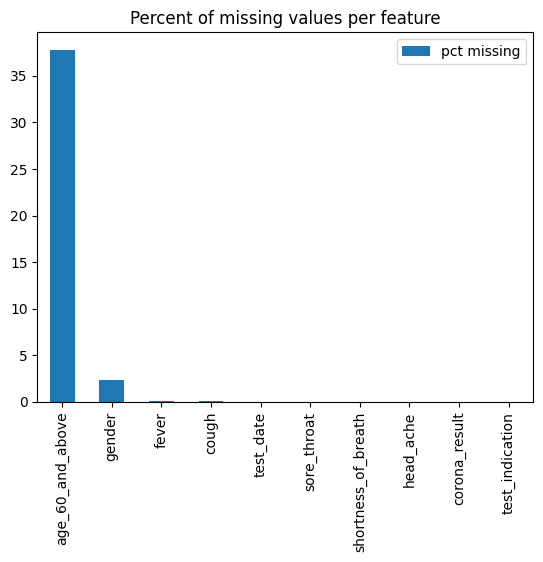

In [12]:
plot_missing_value_pct_per_feature(df_to_check)

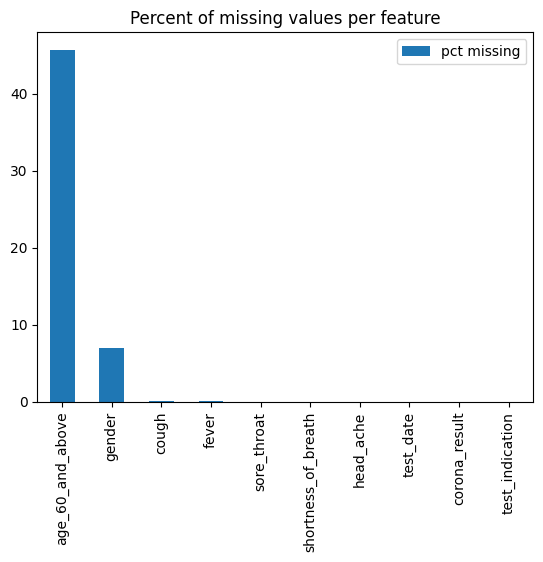

In [13]:
plot_missing_value_pct_per_feature(df)

**Question / Task 1**

Think about possible biases and limitations of this dataset. What are the sources of uncertainty?

In [14]:
# Add your code here


**Question / Task 2**

What is the format of feature values?

In [15]:
# get the train-validation and test sets
df_trainvalidation, df_test = get_data(df, source='paper')
df_combined = pd.concat([df_trainvalidation, df_test])


In [16]:
df_trainvalidation.dtypes

test_date              datetime64[ns]
cough                         float64
fever                         float64
sore_throat                   float64
shortness_of_breath           float64
head_ache                     float64
corona_result                  object
age_60_and_above               object
gender                         object
test_indication                object
dtype: object

**Question / Task 3**

What is the statistics of these feature values? How many symptoms are reported or not?

In [17]:
pd.DataFrame(df_trainvalidation['corona_result'].value_counts()).reset_index()

,corona_result,count
0,negative,48225
1,positive,4795


In [18]:
print(df_trainvalidation.describe())

                           test_date         cough         fever  \
count                          53020  53004.000000  53003.000000   
mean   2020-03-26 23:36:10.863825152      0.149875      0.088882   
min              2020-03-22 00:00:00      0.000000      0.000000   
25%              2020-03-25 00:00:00      0.000000      0.000000   
50%              2020-03-27 00:00:00      0.000000      0.000000   
75%              2020-03-29 00:00:00      0.000000      0.000000   
max              2020-03-31 00:00:00      1.000000      1.000000   
std                              NaN      0.356953      0.284576   

        sore_throat  shortness_of_breath     head_ache  
count  53020.000000         53020.000000  53020.000000  
mean       0.015221             0.012033      0.022199  
min        0.000000             0.000000      0.000000  
25%        0.000000             0.000000      0.000000  
50%        0.000000             0.000000      0.000000  
75%        0.000000             0.000000     

**Question / Task 4**

Which symptoms have a reporting bias, i.e., likely to be reported when the patient is COVID positive?

**Question / Task 5**

How will the symptoms with reporting bias affect the model’s performance?

**Question / Task 6**

Visualization: Draw the bar graph of features grouped by the target class?

In [19]:
list(df_trainvalidation.columns)

['test_date',
 'cough',
 'fever',
 'sore_throat',
 'shortness_of_breath',
 'head_ache',
 'corona_result',
 'age_60_and_above',
 'gender',
 'test_indication']

Text(0.5, 1.0, 'Frequency count of corona result')

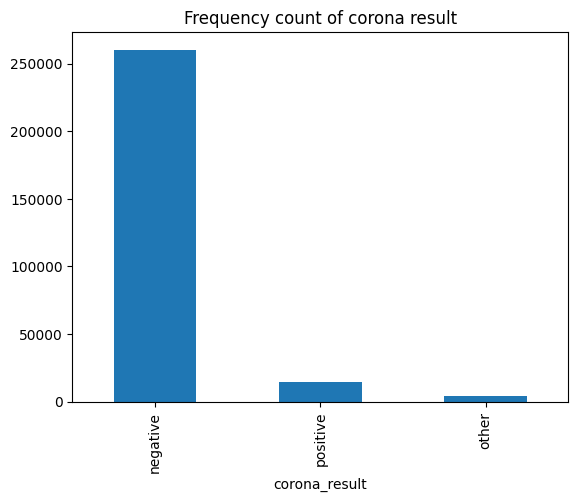

In [20]:
df_summary = df.corona_result.value_counts()
df_summary.plot(kind='bar')
plt.title('Frequency count of corona result')

## remove na's and drop rows where target != positive or negative

In [21]:
target = 'corona_result'


remove the target labels that are neither "positive" or "negative"

In [22]:
#map target to binary
map_replace_target_labels = {'positive': 1, 'negative': 0}
df_trainvalidation[target] = df_trainvalidation[target].map(map_replace_target_labels)
df_test[target] = df_test[target].map(map_replace_target_labels)

## Create pipeline

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
#sklearn.pipeline.Pipeline(steps, *, transform_input=None, memory=None, verbose=False

In [24]:
#features to one hot encode
list_to_encode = ['test_indication', 'gender', 'age_60_and_above' ]

#stuff to ignore and drop from the model
list_to_passthrough = ['test_date']

#already binary features
list_to_pass_to_model = ['cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache']


### Create X and y

? replace with train_test_split

In [25]:
"""
#map age to binary
age_map = {'No': 0, 'Yes': 1}
df_trainvalidation['age_60_and_above'] = df_trainvalidation['age_60_and_above'].map(age_map)


"""

"\n#map age to binary\nage_map = {'No': 0, 'Yes': 1}\ndf_trainvalidation['age_60_and_above'] = df_trainvalidation['age_60_and_above'].map(age_map)\n\n\n"

In [26]:
df_trainvalidation.dropna(inplace=True)
df_test.dropna(inplace=True)

In [27]:
"""
df_trainvalidation.sort_values(by='test_date', inplace=True)
df_test.sort_values(by='test_date', inplace=True)

df_trainvalidation= df_trainvalidation.map()
"""

from sklearn.model_selection import train_test_split

X = df_trainvalidation.drop(target, axis=1)
y = df_trainvalidation[target]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=123)

set up pre-processor pipeline

In [29]:
encoder_onehot = OneHotEncoder(drop='if_binary', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        #("num", numeric_transformer, numerical_features),
        ("cat", encoder_onehot, list_to_encode),
        ("bool", "passthrough", list_to_pass_to_model),
        #("time", "passthrough", time_features),
    ],
    verbose_feature_names_out=False,
    remainder = 'drop' #model will ignore date field
)

classifier = DecisionTreeClassifier()

pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('clf', classifier)
])


In [30]:

X_train_transformed = pd.DataFrame(preprocessor.fit_transform(X_train),columns = preprocessor.get_feature_names_out())

#X_train_transformed

In [31]:
pipeline.fit(X_train, y_train)

#ignoring validation

y_validation_pred = pipeline.predict(X_validation)
y_pred = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)


In [78]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    balanced_accuracy_score,
)

#train scores
accuracy_train = accuracy_score(y_train, y_pred)
precision_train = precision_score(y_train, y_pred)
recall_train = recall_score(y_train, y_pred)
f1score_train = f1_score(y_train, y_pred)

#validation scores
accuracy_val = accuracy_score(y_validation, y_validation_pred)
precision_val = precision_score(y_validation, y_validation_pred)
recall_val = recall_score(y_validation, y_validation_pred)
f1score_val = f1_score(y_validation, y_validation_pred)

print(f"\nAccuracy:")
print(f"Validation set = {accuracy_val}, Training set = {accuracy_train}")
print(f"\nPrecision:")
print(f"Validation set = {precision_val}, Training set = {precision_train}")
print(f"\nRecall:")
print(f"Validation set = {recall_val}, Training set = {recall_train}")
print(f"\nF1 Score:")
print(f"Validation set = {f1score_val}, Training set = {f1score_train}")


Accuracy:
Validation set = 0.9607071174926664, Training set = 0.9585692228512609

Precision:
Validation set = 0.8710407239819005, Training set = 0.8510788822072869

Recall:
Validation set = 0.6609442060085837, Training set = 0.6692628650904033

F1 Score:
Validation set = 0.7515861395802831, Training set = 0.7492992837122392


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_validation, y_validation_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11789
           1       0.87      0.66      0.75      1165

    accuracy                           0.96     12954
   macro avg       0.92      0.83      0.87     12954
weighted avg       0.96      0.96      0.96     12954



In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_test)


0.8050214283645143

Trying other classifiers

In [153]:
def run_pipe(dict_models,
             X_train, 
             y_train,
             X_validation,
             y_validation,
             X_test,
             y_test,
             preprocessor,
             simpleImputer = "None"
            ):
    
    dict_results = {}
    dict_confusion_matrixes = {}
    dict_roc_auc_scores = {}
    dict_pipeline = {}
    
    for model_name, model in dict_models.items():
        if simpleImputer == "None":
            pipeline = Pipeline([
                ('preprocessor', preprocessor),
                ('clf', model)
            ])
        else:
            pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('imputer', simpleImputer),
            ('clf', model)
        ])

        pipeline.fit(X_train, y_train)
        #ignoring validation
        
        dict_pipeline[model_name] = pipeline

        y_validation_pred = pipeline.predict(X_validation)
        y_pred = pipeline.predict(X_train)
        
        #y_pred_proba_validation = pipeline.predict_proba(X_validation)[:,1]
        
        """
        dict_varying_threshold = {}
        for threshold in np.arange(0.1, 0.95, 0.05):
            custom_predictions = y_pred_proba_validation >= threshold
            vary_threshold_precision_valid = precision_score(y_validation, y_validation_pred)
            vary_threshold_recall_valid = recall_score(y_validation, y_validation_pred)
            
            temp_dict = {}
            temp_dict['vary_threshold_precision_valid'] = vary_threshold_precision_valid
            temp_dict['vary_threshold_recall_valid'] = vary_threshold_recall_valid
            dict_varying_thresholdp[threshold] = temp_dict
        """
                    
        y_pred_test = pipeline.predict(X_test)

        #train scores
        accuracy_train = balanced_accuracy_score(y_train, y_pred)
        precision_train = precision_score(y_train, y_pred)
        recall_train = recall_score(y_train, y_pred)
        f1score_train = f1_score(y_train, y_pred)
        f1score_train_weighted = f1_score(y_train, y_pred, average='macro')
        f1score_train_balanced = f1_score(y_train, y_pred, average='weighted')

        #validation scores
        accuracy_val = balanced_accuracy_score(y_validation, y_validation_pred)
        precision_val = precision_score(y_validation, y_validation_pred)
        recall_val = recall_score(y_validation, y_validation_pred)
        f1score_val = f1_score(y_validation, y_validation_pred)
        f1score_val_weighted = f1_score(y_validation, y_validation_pred, average='macro')
        f1score_val_balanced = f1_score(y_validation, y_validation_pred, average='weighted')
        
        temp_results_dict = {}
        temp_results_dict['accuracy_train'] = accuracy_train
        temp_results_dict['precision_train'] = precision_train
        temp_results_dict['recall_train'] = recall_train
        temp_results_dict['f1score_train'] = f1score_train
        temp_results_dict['f1score_train_weighted'] = f1score_train_weighted
        temp_results_dict['f1score_train_balanced'] = f1score_train_balanced
        
        temp_results_dict['accuracy_val'] = accuracy_val
        temp_results_dict['precision_val'] = precision_val
        temp_results_dict['recall_val'] = recall_val
        temp_results_dict['f1score_val'] = f1score_val
        temp_results_dict['f1score_val_weighted'] = f1score_val_weighted
        temp_results_dict['f1score_val_balanced'] = f1score_val_balanced
        
        dict_results[model_name] = temp_results_dict
        
        conf_matrix = classification_report(y_validation, y_validation_pred)
        dict_confusion_matrixes[model_name] = conf_matrix
        
        roc_score = roc_auc_score(y_test, y_pred_test)
        roc_score_validation = roc_auc_score(y_validation, y_validation_pred)
        temp_results_dict = {}
        temp_results_dict['roc_score'] = roc_score
        temp_results_dict['roc_score_validation'] = roc_score_validation
        
        dict_roc_auc_scores[model_name] = temp_results_dict
    
    df_results = pd.DataFrame(dict_results)
    
    
    return df_results, dict_confusion_matrixes, dict_roc_auc_scores, dict_pipeline

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

import xgboost as xgb

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
#dict_models = {
#    'RandomForestClassifier': RandomForestClassifier(),
#    'DecisionTreeClassifier': DecisionTreeClassifier(),
#    'XGBoost': xgb.XGBClassifier()
#    }

dict_models = {
    "Logistic Regression": LogisticRegression(random_state = 123),
    
    "K-Nearest Neighbors": KNeighborsClassifier(),
    
    "Support Vector Classifier (SVC)": SVC(random_state = 123),
    
    "Decision Tree": DecisionTreeClassifier(random_state = 123),
    
    "Random Forest": RandomForestClassifier(
        class_weight = 'balanced', 
        random_state = 123, 
        max_depth = 10
    ),
    
    "Gaussian Naive Bayes": GaussianNB(),
    
    "Gradient Boosting": GradientBoostingClassifier(random_state = 123),
    
    'XGBoost': xgb.XGBClassifier(random_state = 123)
}

In [85]:
df_results, dict_confusion_matrixes, dict_roc_auc_scores = run_pipe(dict_models,
             X_train, 
             y_train,
             X_validation,
             y_validation,
             X_test,
             y_test,
            preprocessor
            )

In [86]:
# subset to lesser number of features
list_to_encode_subset = ['test_indication', 'gender', 'age_60_and_above']
list_to_pass_to_model_subset = [
    'cough', 'fever'
]

#change list above to exclude:
#'sore_throat', 'shortness_of_breath', 'head_ache'

preprocessor_two = ColumnTransformer(
    transformers=[
        #("num", numeric_transformer, numerical_features),
        ("cat", encoder_onehot, list_to_encode_subset),
        ("bool", "passthrough", list_to_pass_to_model_subset),
        #("time", "passthrough", time_features),
    ],
    verbose_feature_names_out=False,
    remainder = 'drop' #model will ignore date field
)

In [87]:
df_results_subset, dict_confusion_matrixes_subset, dict_roc_auc_scores_subset = run_pipe(dict_models,
             X_train, 
             y_train,
             X_validation,
             y_validation,
             X_test,
             y_test,
            preprocessor_two
            )

In [ ]:
dict_roc_auc_scores

## initial output - all features included

In [88]:
df_all = pd.concat([pd.DataFrame(dict_roc_auc_scores.values(), index=dict_roc_auc_scores.keys()).T, df_results])
df_all

,Logistic Regression,K-Nearest Neighbors,Support Vector Classifier (SVC),Decision Tree,Random Forest,Gaussian Naive Bayes,Gradient Boosting,XGBoost
roc_score,0.730174,0.765876,0.804622,0.804725,0.846992,0.817019,0.796349,0.804725
roc_score_validation,0.746183,0.780277,0.804132,0.802844,0.882111,0.862094,0.798415,0.802844
accuracy_train,0.742553,0.773530,0.807151,0.805902,0.888025,0.864722,0.800892,0.805902
precision_train,0.753865,0.688021,0.714907,0.716250,0.435342,0.431604,0.721564,0.716250
recall_train,0.501808,0.573574,0.640334,0.637552,0.894298,0.842559,0.626426,0.637552
f1score_train,0.602538,0.625607,0.675569,0.674614,0.585610,0.570809,0.670637,0.674614
f1score_train_weighted,0.784680,0.795454,0.822193,0.821720,0.758718,0.751466,0.819742,0.821720
f1score_train_balanced,0.933121,0.933876,0.941689,0.941608,0.899796,0.898698,0.941259,0.941608
accuracy_val,0.746183,0.780277,0.804132,0.802844,0.882111,0.862094,0.798415,0.802844
precision_val,0.770535,0.699487,0.726555,0.725743,0.427678,0.421598,0.734964,0.725743


In [89]:

#highest roc auc
df_all.loc['roc_score_validation'].idxmax()

'Random Forest'

## second output - subset of features

In [144]:
df_all_subset = pd.concat([pd.DataFrame(dict_roc_auc_scores_subset.values(), index=dict_roc_auc_scores_subset.keys()).T, df_results_subset])
df_all_subset.style.highlight_max(axis='columns')

,Logistic Regression,K-Nearest Neighbors,Support Vector Classifier (SVC),Decision Tree,Random Forest,Gaussian Naive Bayes,Gradient Boosting,XGBoost
roc_score,0.730174,0.765876,0.804622,0.804725,0.846992,0.817019,0.796349,0.804725
roc_score_validation,0.746183,0.780277,0.804132,0.802844,0.882111,0.862094,0.798415,0.802844
accuracy_train,0.742553,0.773530,0.807151,0.805902,0.888025,0.864722,0.800892,0.805902
precision_train,0.753865,0.688021,0.714907,0.716250,0.435342,0.431604,0.721564,0.716250
recall_train,0.501808,0.573574,0.640334,0.637552,0.894298,0.842559,0.626426,0.637552
f1score_train,0.602538,0.625607,0.675569,0.674614,0.585610,0.570809,0.670637,0.674614
f1score_train_weighted,0.784680,0.795454,0.822193,0.821720,0.758718,0.751466,0.819742,0.821720
f1score_train_balanced,0.933121,0.933876,0.941689,0.941608,0.899796,0.898698,0.941259,0.941608
accuracy_val,0.746183,0.780277,0.804132,0.802844,0.882111,0.862094,0.798415,0.802844
precision_val,0.770535,0.699487,0.726555,0.725743,0.427678,0.421598,0.734964,0.725743


In [145]:
#highest roc auc
df_all_subset.loc['roc_score_validation'].idxmax()

'Random Forest'

# Preferred model to use = random forest


In [108]:
df_reload['test_date'].unique()

<DatetimeArray>
['2020-04-30 00:00:00', '2020-04-29 00:00:00', '2020-04-28 00:00:00',
 '2020-04-27 00:00:00', '2020-04-26 00:00:00', '2020-04-25 00:00:00',
 '2020-04-24 00:00:00', '2020-04-23 00:00:00', '2020-04-22 00:00:00',
 '2020-04-21 00:00:00', '2020-04-20 00:00:00', '2020-04-19 00:00:00',
 '2020-04-18 00:00:00', '2020-04-17 00:00:00', '2020-04-16 00:00:00',
 '2020-04-15 00:00:00', '2020-04-14 00:00:00', '2020-04-13 00:00:00',
 '2020-04-12 00:00:00', '2020-04-11 00:00:00', '2020-04-10 00:00:00',
 '2020-04-09 00:00:00', '2020-04-08 00:00:00', '2020-04-07 00:00:00',
 '2020-04-06 00:00:00', '2020-04-05 00:00:00', '2020-04-04 00:00:00',
 '2020-04-03 00:00:00', '2020-04-02 00:00:00', '2020-04-01 00:00:00',
 '2020-03-31 00:00:00', '2020-03-30 00:00:00', '2020-03-29 00:00:00',
 '2020-03-28 00:00:00', '2020-03-27 00:00:00', '2020-03-26 00:00:00',
 '2020-03-25 00:00:00', '2020-03-24 00:00:00', '2020-03-23 00:00:00',
 '2020-03-22 00:00:00', '2020-03-21 00:00:00', '2020-03-20 00:00:00',
 '20

In [133]:
#get_data(df, train_start = '2020-03-21', test_start = '2020-03-31', test_end = '2020-04-07', source='paper'

df_reload = pd.read_csv("data/corona_tested_individuals_ver_006.english.csv")
df_reload['test_date'] = pd.to_datetime(df_reload['test_date'])
df_reload = df_reload[df_reload['corona_result'] != 'other']

df_trainvalidation_extended, df_test_extended = get_data(df_reload,  source='not paper', train_end = '2020-04-23', test_end = '2020-04-30')

/tmp/ipykernel_30/1612843223.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reload = pd.read_csv("data/corona_tested_individuals_ver_006.english.csv")


In [135]:
map_replace_target_labels = {'positive': 1, 'negative': 0}
df_trainvalidation_extended[target] = df_trainvalidation_extended[target].map(map_replace_target_labels)
df_test_extended[target] = df_test_extended[target].map(map_replace_target_labels)

X = df_trainvalidation_extended.drop(target, axis=1)
y = df_trainvalidation_extended[target]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=123)

X_test = df_test_extended.drop(target, axis=1)
y_test = df_test_extended[target]


/tmp/ipykernel_30/660173315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trainvalidation_extended[target] = df_trainvalidation_extended[target].map(map_replace_target_labels)
/tmp/ipykernel_30/660173315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_extended[target] = df_test_extended[target].map(map_replace_target_labels)


In [136]:
#update preprocessor to handle nan / missing values
from sklearn.impute import SimpleImputer
imputer_simple = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value = -1)


preprocessor_three = ColumnTransformer(
    transformers=[
        #("num", numeric_transformer, numerical_features),
        ("cat", encoder_onehot, list_to_encode_subset),
        ("bool", "passthrough", list_to_pass_to_model_subset),
        #("time", "passthrough", time_features),
    ],
    verbose_feature_names_out=False,
    remainder = 'drop' #model will ignore date field
)

In [139]:
df_results_subset_fulldf, dict_confusion_matrixes_subset_fulldf, dict_roc_auc_scores_subset_fulldf = run_pipe(dict_models,
             X_train, 
             y_train,
             X_validation,
             y_validation,
             X_test,
             y_test,
            preprocessor_two,
            imputer_simple                                                                                             
            )

In [142]:
df_all_subset_fulldf = pd.concat([pd.DataFrame(dict_roc_auc_scores_subset_fulldf.values(), index=dict_roc_auc_scores_subset_fulldf.keys()).T, df_results_subset_fulldf])
df_all_subset_fulldf.style.highlight_max(axis='columns')

,Logistic Regression,K-Nearest Neighbors,Support Vector Classifier (SVC),Decision Tree,Random Forest,Gaussian Naive Bayes,Gradient Boosting,XGBoost
roc_score,0.549166,0.743939,0.763751,0.766154,0.771379,0.763435,0.763751,0.766154
roc_score_validation,0.711325,0.743088,0.731629,0.731994,0.843967,0.811850,0.741663,0.731994
accuracy_train,0.714169,0.740829,0.729563,0.731132,0.847059,0.809340,0.738155,0.731029
precision_train,0.699212,0.688972,0.740306,0.738541,0.337726,0.311584,0.726238,0.738457
recall_train,0.440231,0.495712,0.469470,0.472776,0.791611,0.718359,0.487860,0.472569
f1score_train,0.540290,0.576579,0.574572,0.576504,0.473460,0.434644,0.583647,0.576325
f1score_train_weighted,0.758518,0.776958,0.776494,0.777468,0.707867,0.686726,0.781007,0.777375
f1score_train_balanced,0.950954,0.953655,0.954552,0.954681,0.914570,0.909015,0.955041,0.954664
accuracy_val,0.711325,0.743088,0.731629,0.731994,0.843967,0.811850,0.741663,0.731994
precision_val,0.686226,0.688205,0.742829,0.739194,0.329029,0.310620,0.726852,0.739194


In [141]:
#highest roc auc
df_all_subset_fulldf.loc['roc_score_validation'].idxmax()

'Random Forest'

# Random Forest model

In [147]:
dict_models_rf = {
        "Random Forest": RandomForestClassifier(
        class_weight = 'balanced', 
        random_state = 123, 
        max_depth = 10
    )
}

In [154]:
df_results_subset_fulldf_rf, dict_confusion_matrixes_subset_fulldf_rf, dict_roc_auc_scores_subset_fulldf_rf, dict_pipeline_rf = run_pipe(
            dict_models_rf,
             X_train, 
             y_train,
             X_validation,
             y_validation,
             X_test,
             y_test,
            preprocessor_two,
            imputer_simple                                                                                             
            )

In [155]:
df_results_subset_fulldf_rf = pd.concat([pd.DataFrame(dict_roc_auc_scores_subset_fulldf_rf.values(), index=dict_roc_auc_scores_subset_fulldf_rf.keys()).T, df_results_subset_fulldf_rf])
df_results_subset_fulldf_rf.style.highlight_max(axis='columns')


,Random Forest
roc_score,0.771379
roc_score_validation,0.843967
accuracy_train,0.847059
precision_train,0.337726
recall_train,0.791611
f1score_train,0.473460
f1score_train_weighted,0.707867
f1score_train_balanced,0.914570
accuracy_val,0.843967
precision_val,0.329029


Text(0.5, 1.0, 'Random forest feature importances')

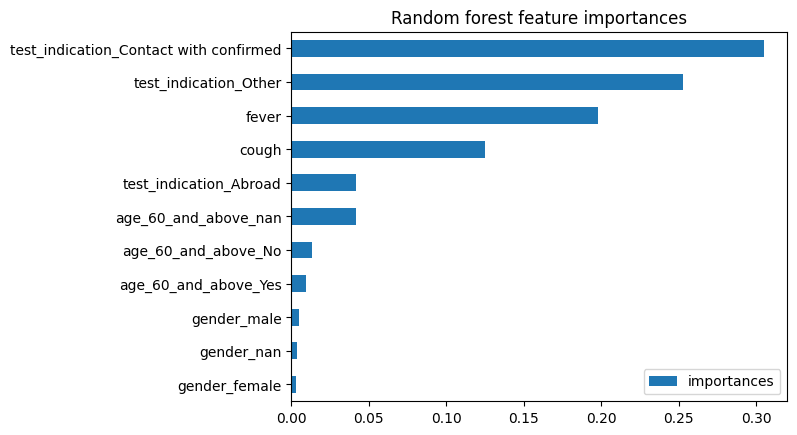

In [217]:
# Sort feature importances in descending order
importances = rf_pipe.steps[2][1].feature_importances_
indices = np.argsort(importances)[::-1]
 
# Rearrange feature names so they match the sorted feature importances
names = rf_pipe.named_steps['preprocessor'].get_feature_names_out() 


dict_importances = {
    'names': names,
    'importances': importances,
}

df_importances = pd.DataFrame(dict_importances).sort_values(by='importances', ascending=True)
df_importances.plot(kind='barh')

labels = list(df_importances['names'])
ticklocations = [i for i in range(len(names))]

plt.yticks(ticks= ticklocations, labels = labels);
plt.legend(loc='lower right')
plt.title('Random forest feature importances')

## Precision Recall Plot

"\ndict_varying_threshold = {}\nfor threshold in np.arange(0.1, 0.95, 0.05):\n    \n    custom_predictions = y_pred_proba_test >= threshold\n    vary_threshold_precision_valid = precision_score(y_test, custom_predictions)\n    vary_threshold_recall_valid = recall_score(y_test, custom_predictions)\n\n    temp_dict = {}\n    temp_dict['vary_threshold_precision_valid'] = vary_threshold_precision_valid\n    temp_dict['vary_threshold_recall_valid'] = vary_threshold_recall_valid\n    dict_varying_thresholdp[threshold] = temp_dict\n"

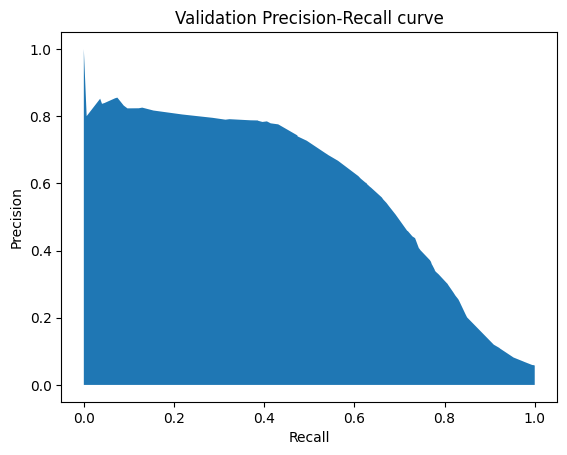

In [261]:
from sklearn.metrics import PrecisionRecallDisplay

threshold = 0.5

classifier = rf_pipe.steps[2][1]
y_pred_proba_test = rf_pipe.predict_proba(X_test)[:,1]
y_pred_test = y_pred_proba_test > threshold

#validation
y_pred_proba_validation = rf_pipe.predict_proba(X_validation)[:,1]
y_pred_validation = y_pred_proba_validation > threshold

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_validation, y_pred_proba_validation)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Validation Precision-Recall curve");

"""
dict_varying_threshold = {}
for threshold in np.arange(0.1, 0.95, 0.05):
    
    custom_predictions = y_pred_proba_test >= threshold
    vary_threshold_precision_valid = precision_score(y_test, custom_predictions)
    vary_threshold_recall_valid = recall_score(y_test, custom_predictions)

    temp_dict = {}
    temp_dict['vary_threshold_precision_valid'] = vary_threshold_precision_valid
    temp_dict['vary_threshold_recall_valid'] = vary_threshold_recall_valid
    dict_varying_thresholdp[threshold] = temp_dict
"""


# ROC AUC plot

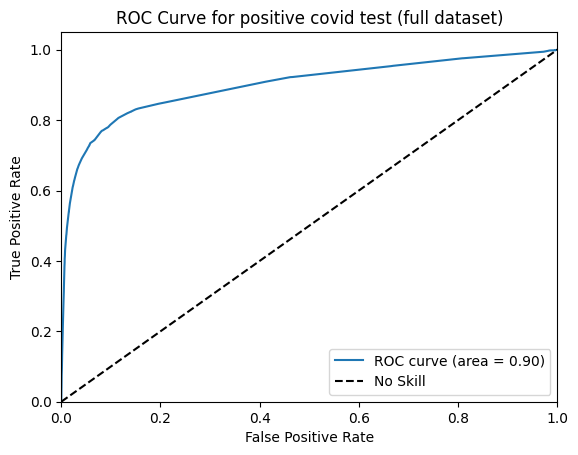

In [265]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_validation, y_pred_proba_validation) 

roc_auc = auc(fpr, tpr)

# Plot the ROC curve

plt.figure()  

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--', label='No Skill')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve for positive covid test (full dataset)')

plt.legend()

plt.show()
 


# Next steps

**Wrapping up where we are at**
* extend the data set in use, control for missing values by adjusting the pipeline accordingly (add imputer for cat and numerical features) , add simple imputer at end of the pipeline with -1 for missing values - DONE
* partial dependency plots
* once best model identified, visualise the feature importances, and / or SHAP values - ?

* How will you select the threshold for your model above which model score will be interpreted as a prediction of positive diagnosis.

**extras**
* Dimensionality Reduction for fun: Can you reduce the dimension to just 2 dimensions and check if the inputs corresponding to different classes belong to different clusters? Try using t-SNE or UMAP for that purpose.
* Collaborate with Ensemble: Can you combine other models?

to include in slide:
* degree of data lost through dropna - decision required as a group as to whether to include and impute, or, drop. not both. 